In [46]:
#%install_ext https://raw.github.com/cpcloud/ipython-autotime/pull/5
#%load_ext autotime

# Ch. 4: Training Models

***
***

What did we do last few chapters? 
 - Optimized a regression system
 - Improved image classification
 
Time to look under the hood for more efficient debugging.

What will we look at upcoming?
 - Linear Regression models
  - Training Method 1: "closed-form" equation computing best fit model parameters to minimize cost function over training set
  - Training Method 2: "Gradient Descent", tweaking parameters to converge on model parameters that minimize cost function.
 - Polynomial Regression models
  - Detect overfitting
  - Regularization techniques to avoid overfitting
  - Regression for classification
   - Logistic regression
   - Softmax regression
***

## 4.1 - Linear Regression

### 4.1.1 - Mathematical Definition of Linear Regression Model

Linear model predicts via a weighted sum of input features plus a bias term:

$$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

- $\hat{y}$: predicted value
- $n$: number of features (or dimensions)
- $x_{i}$: ith feature
- $\theta_{j}$: jth model parameter including bias term as $\theta_{0}$

In vectorized notation:

$$\boxed{\hat{y} = h_{\boldsymbol{\theta}} \textbf{(x)} = \boldsymbol{\theta} \cdot \textbf{x}}$$
- $\boldsymbol{\theta}$: **Parameter Vector** containing bias term $\theta_{0}$ and feature weights $\theta_1$ to $\theta_n$
- $\textbf{x}$: **Feature Vector** containing $x_0$ to $x_n$ where $x_0 = 1$
- $\boldsymbol{\theta} \cdot \textbf{x}$: **Dot Product** of _parameter_ and _feature_ vectors (element-wise multiplaction then summing)
- $h_0$: **Hypothesis Function** using model parameters $\boldsymbol{\theta}$

Vectors are often represented as **column vectors**. If we are indeed only dealing with column vectors of a single column for a single instance (and we include our bias term), we can say our prediction in matrix multiplication form becomes:

$$\boxed{\hat{y} = \boldsymbol{\theta}^{T}\textbf{x}}$$

### 4.1.2 - Training Linear Regression: Cost Function

Ch. 2, we saw common use is the _Root Mean Square Error_ (RMSE). We want to find a value of $\boldsymbol{\theta}$ that minimizes the RMSE. Can also use the _Mean Square Error_ (MSE) as if the square root of a function is minimized, so is the function.

**MSE of Linear Regression of hypothesis** $h_{\theta}$ **on a training set** $\textbf{X}$:

$$\boxed{MSE(\textbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)})^2}$$

### 4.1.3 - Training Linear Regression: Closed Form Solution of Minimization of Cost Function

There is an equation that directly gives the best value for $\boldsymbol{\theta}$ called the **normal equation**:

$$\boxed{\boldsymbol{\hat{\theta}} = (\textbf{X}^{T}\textbf{X})^{-1} \textbf{X}^T \textbf{y}}$$

- $\hat{\boldsymbol{\theta}}$: parameter vector that minimizes cost function
- $\textbf{y}$: vector of target values

#### 4.1.3.1 - Testing and Plotting Closed Form Solution

Below, we can generate a random dataset with a linear dependence and compute our parameter vector that minimizes the cost function. Numpy has a linear algebra module that can compute the inverse and dot product of two matricies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *

X = 2 * np.random.rand(100,1)

def get_rand_lin_dist(alpha, beta):
    return alpha + beta * X + np.random.randn(100, 1)

def get_theta_best(X, Y):
    X_tot = np.c_[np.ones((100,1)), X]     # Add x0 = 1 to every instance
    return np.linalg.inv(X_tot.T.dot(X_tot)).dot(X_tot.T).dot(Y)

def plt_rand_lin_dist(alpha, beta):
    Y = get_rand_lin_dist(alpha, beta)
    
    X_lims = np.linspace(0, 2, num=100)
    X_lims_with_xo = np.c_[np.ones((100,1)), X_lims]
    
    theta_closed_form_pred = get_theta_best(X, Y)
    
    y_pred = X_lims_with_xo.dot(theta_closed_form_pred)
    
    plt.scatter(X, Y)
    plt.plot(X_lims, y_pred, 'r-')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Random Linear Distribution \n with Closed Form Fit')
    plt.xlim(0, 2)
    plt.ylim(0,20)
    plt.show()
    
    print("Closed Form Best Theta Predictions: ", theta_closed_form_pred)
    
interactive_plt_rand_lin_dist = interactive(plt_rand_lin_dist, 
                                            alpha=(0,20), beta=(0,10))
interactive_plt_rand_lin_dist

interactive(children=(IntSlider(value=10, description='alpha', max=20), IntSlider(value=5, description='beta',…

Interestingly enough, the closed form solution to $\hat{\boldsymbol{\theta}}$ has been thrown off by the random noise.

#### 4.1.3.2 Linear Regression via Scikit-Learn



In [2]:
from sklearn.linear_model import LinearRegression

y = get_rand_lin_dist(4, 3)

lin_reg=LinearRegression()
lin_reg.fit(X, y)
print("Intercept and Coefficient: ", lin_reg.intercept_, lin_reg.coef_)

Intercept and Coefficient:  [4.04295841] [[2.97075863]]


This did well! Now, we want it to predict new values, those at 0 and those at 2. 

In [3]:
X_new = np.array([[0], [2]])

print("Models Prediction for X @ 0 and 2: ", lin_reg.predict(X_new))

Models Prediction for X @ 0 and 2:  [[4.04295841]
 [9.98447567]]


If we adjust the sliders in our linear regression plot, we can see this is pretty close to what we expect.

The _LinearRegression_ class uses _scipy.linalg.lstsq()_, which can be called directly to provide a similar result.

#### 4.1.3.3 Calculating Pseudoinverse and Complexity of Lin. Reg.

We can calculate what is known as the _pseudoinverse_ directly (called the Moore-Penrose inverse):

$$\boldsymbol{\hat{\theta}} = \textbf{X}^{+}\textbf{y}$$

In [4]:
X_with_xo = np.c_[np.ones((100,1)), X]

print("Shape of X_with_xo:", X_with_xo.shape)
print("Shape of y: ", y.shape)
print("Pseudoinverse: ", np.linalg.pinv(X_with_xo).dot(y))

Shape of X_with_xo: (100, 2)
Shape of y:  (100, 1)
Pseudoinverse:  [[4.04295841]
 [2.97075863]]


The shapes make it clear why we are seeing a 2-dimensional feature vector.

Calculating a pseudoinverse is more efficient than computing the normal equation. Made clear by looking at their **complexities**:
- Normal equation = $O(n^{2.4}) \hspace{0.25cm} to \hspace{0.25cm} O(n^{3})$
- SVD = $O(n^2)$

**WARNING**: Finding the optimal feature vector $\boldsymbol{\hat{\theta}}$ gets slow with large number of features ($n > 100,000$). Scales linearly with number of instances though - $O(m)$ 

Once trained, you get very fast predictions (linear complexity w/ number of desired predictions). 

### 4.1.4 - Training Linear Regression: Gradient Descent

**Gradient Descent**: Uses local gradient of error function to find local minimum of parameter vector $\boldsymbol{\hat{\theta}}$ by stepping in direction of decreasing slope until the gradient is zero.

Start with random $\boldsymbol{\hat{\theta}}$ values and taking steps that decrease the cost function:

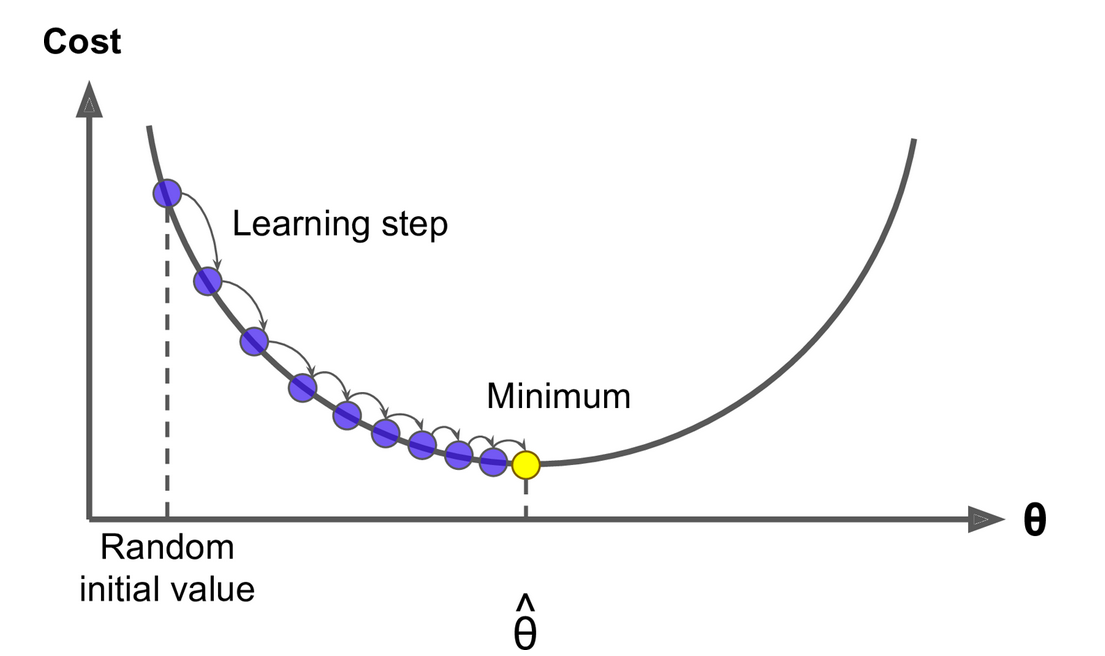

_Hyperparameter_: step size
- If step size is too big, may jump across local minimum and algorithm will diverge
- If step size is too small, too many iterations for your computing power

May hit a _local minimum_ or a _plateau_:

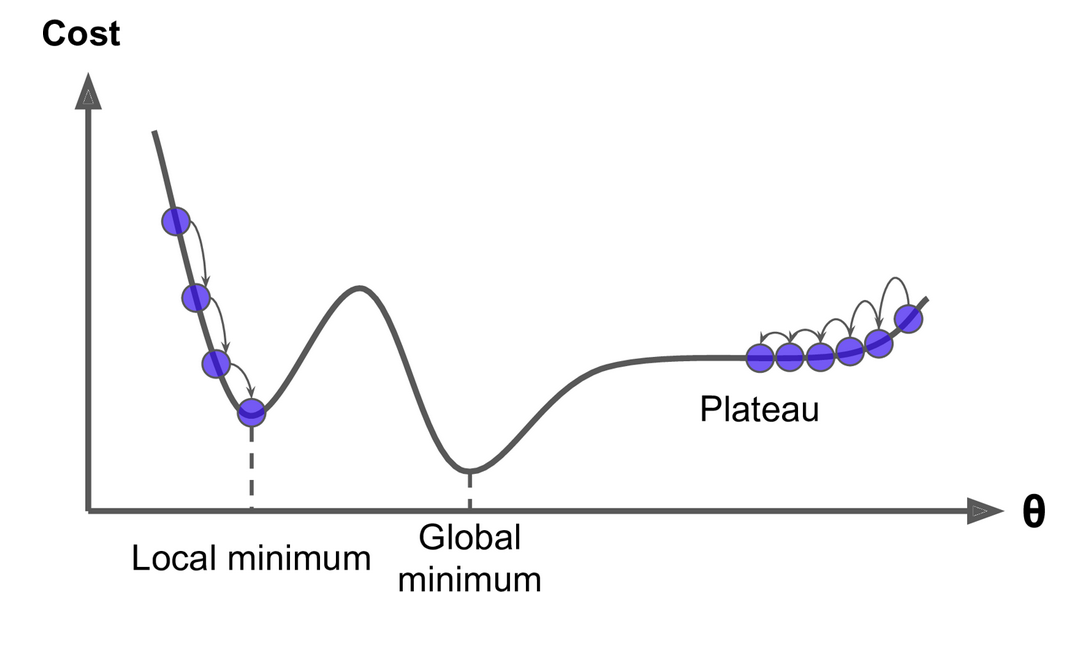

For linear regression, there's no local minima (just one global one) and there's no abrupt changes.

**WARNING**: When using gradient descent, the features should have the same scale (Scikit-Learn's _StandardScaler_ class).

#### 4.1.4.1 Batch Gradient Descent

##### 4.1.4.1.1 Defining the Gradient Vector

**GOAL:** Find gradient of cost function with respect to each model parameter $\theta_{j}$. Use the _partial derivative_. 

Given our mean square error function...

$$MSE(\textbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)})^2 = $$

Power rule the theta vector and use the chain rule...

$$\frac{\partial}{\partial \theta_j} MSE(\boldsymbol{\theta}) = \frac{2}{m} \sum^{m}_{i=1}\left(\boldsymbol{\theta}^{T}\textbf{x}^{(i)} - y^{(i)}\right) x_{j}^{(i)}$$

**GRADIENT VECTOR OF THE COST FUNCTION (MSE)**:

$$\boxed{\nabla_{\theta}MSE(\boldsymbol{\theta}) = \begin{pmatrix} \frac{\partial}{\partial \theta_0} MSE(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} MSE(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_n} MSE(\boldsymbol{\theta})  \end{pmatrix} = \frac{2}{m}\textbf{X}^{T}\left(\textbf{X}\boldsymbol{\theta} - \textbf{y}\right)}$$

Think about what this equation is saying. The training set multiplied by the prediction vector ($\textbf{X}\boldsymbol{\theta}$) is the model's current prediciton. Subtract from that the actual value we want and we get the difference in "height" given the current value of the feature vector. The training set transposed multiplied into that difference means we are multiplying that feature (now a row) given all instances (now a column) by the difference in "height" for all instances (what was inside the parentheses). Once scaled appropriately, it gives the **gradient vector of the cost function**.

**WARNING**: This calculates over the full training set (the entire _batch_). Uses entire training set at every step. This is bad for large numbers of instances. Scales well with the number of features (much faster than Normal Equation or SVD for large number of features).

##### 4.1.4.1.2 Using the Gradient Vector

We want to move opposite of the gradient vector:

$$\boldsymbol{\theta^{'}} = \boldsymbol{\theta} - \eta\nabla_{\theta}$$

- $\eta$: Step size

Implementing this:

In [26]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) #Random initialization

def batch_grad_descent(eta, n_iterations, theta):
    for iteration in range(n_iterations):
        gradients = 2/m * X_with_xo.T.dot(X_with_xo.dot(theta) - y)
        theta = theta - (eta * gradients)
    return theta

print("Theta vector with Batch Grad Descent: ", batch_grad_descent(eta, n_iterations, theta))

Theta vector with Batch Grad Descent:  [[4.12157415]
 [2.98433767]]


Pretty good! Let's show what happens when you play around with the step size:

In [5]:
def plt_steps_batch_grad_descent(eta, n_iterations):  
    X_lims = np.linspace(0, 2, num=100)
    X_lims_with_xo = np.c_[np.ones((100,1)), X_lims]
    
    theta = np.random.rand(2,1) #Random initialization
    m = 100
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_with_xo.T.dot(X_with_xo.dot(theta) - y)
        theta = theta - (eta * gradients)
        y_pred = X_lims_with_xo.dot(theta)
        plt.plot(X_lims, y_pred)
    
    plt.scatter(X, y)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Batch Gradient Descent \n Scaling Step Size and Iterations')
    plt.xlim(0, 2)
    plt.ylim(0,10)
    plt.legend(np.linspace(1, n_iterations, num=n_iterations))
    plt.show()
    
    print("Batch Gradient Descent Final Pred.: ", theta)
    
interactive_plt_steps_batch_grad_descent = interactive(plt_steps_batch_grad_descent, 
                                            eta=(0.001, 0.501), n_iterations=(0,7))
interactive_plt_steps_batch_grad_descent  

interactive(children=(FloatSlider(value=0.251, description='eta', max=0.501, min=0.001), IntSlider(value=3, de…

Finding a good learning rate, use _GridSearch_, but limit the number of iterations or it will take too long. 

#### 4.1.4.1 Stochiastic Gradient Descent

**Stochiastic Gradient Descent**: Picks random instance in training set at every step. Computes gradient with just that instance.

Pros:
- Much faster
- Can train on huge daining sets
- Can jump out of local mins

Cons:
- Less regular (lots of bounces)
- Does not settle on optimal final value

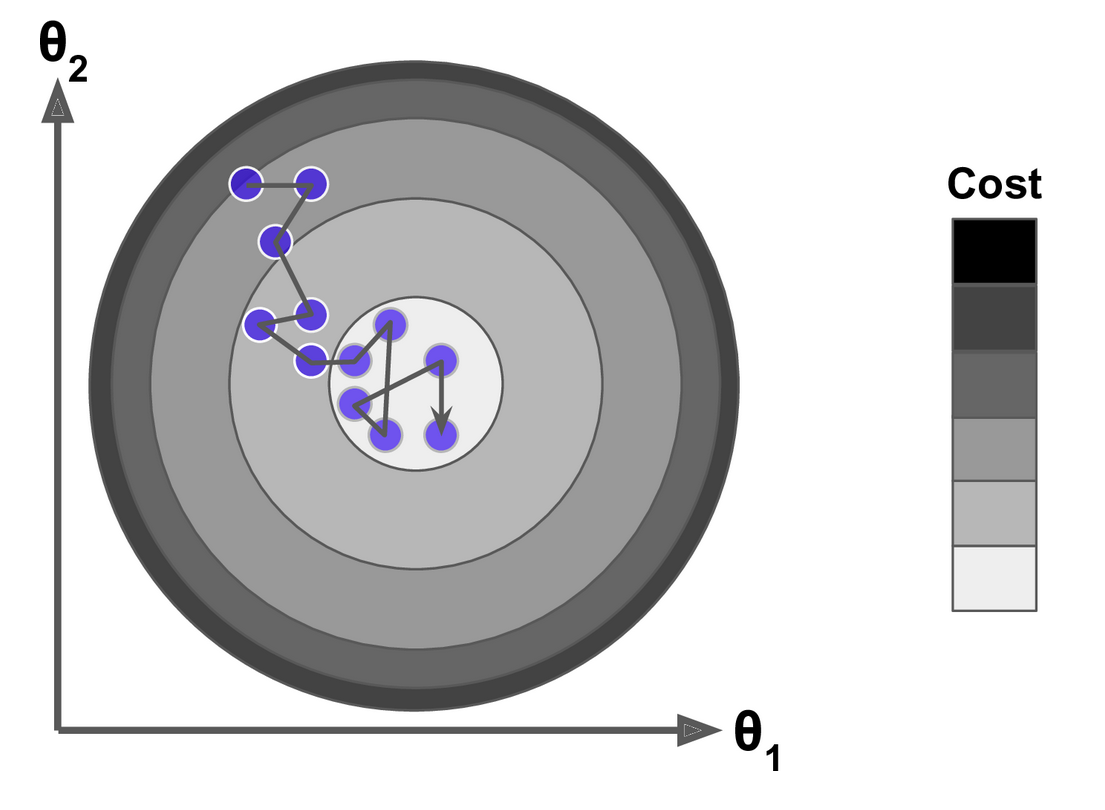

Can dynamically, gradually reduce the learning rate to settle at global min (also called _simulated annealing_).

Let's implement it with a simple _learning schedule_ (or the rate at which we reduce our step size):